In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


df.isnull().sum()

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
pd.to_numeric(df['TotalCharges'], errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
df['TotalCharges'] =pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

In [9]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [10]:
df = df.dropna(subset= 'TotalCharges')

In [11]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [12]:
df.drop('customerID', axis=1, inplace=True)

## Encodeing

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

In [16]:
# Apply label Encoding for Binary Columns
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
# Apply get_dummies for other categorical columns
df = pd.get_dummies(df, drop_first=True)

In [18]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True


In [19]:
df.shape

(7032, 31)

In [20]:
df.dtypes.head()

gender           int64
SeniorCitizen    int64
Partner          int64
Dependents       int64
tenure           int64
dtype: object

# EDA and Feature Analysis

## Churn Distribution

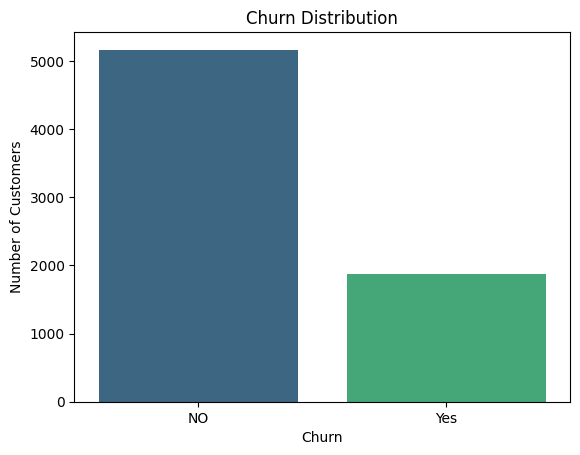

In [21]:
sns.countplot(data=df, x = 'Churn', palette='viridis', hue = 'Churn', legend=False)
plt.title('Churn Distribution')
plt.xticks([0, 1], ['NO', 'Yes'])
plt.ylabel('Number of Customers')
plt.show()

## Tenure vs. Churn

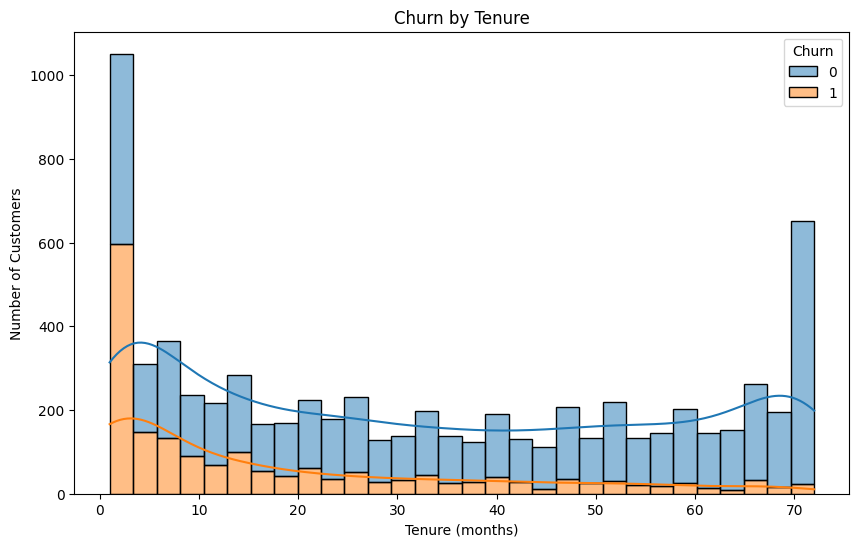

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x = 'tenure', hue='Churn', bins=30, kde=True, multiple='stack')
plt.title('Churn by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel("Number of Customers")
plt.show()

## Monthly Charge vs.Churn

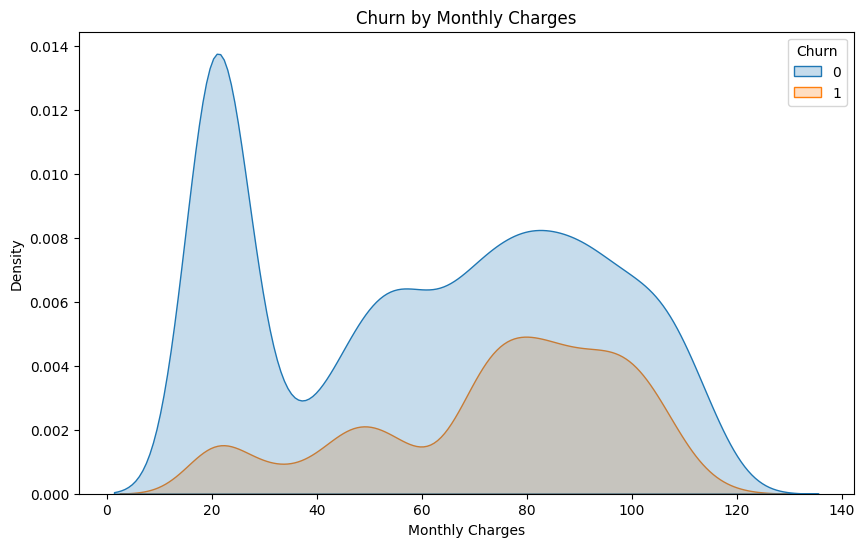

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x = 'MonthlyCharges', hue = 'Churn', fill=True) 
plt.title('Churn by Monthly Charges')
plt.xlabel("Monthly Charges")
plt.ylabel('Density')
plt.show()

## Churn by Contact Type

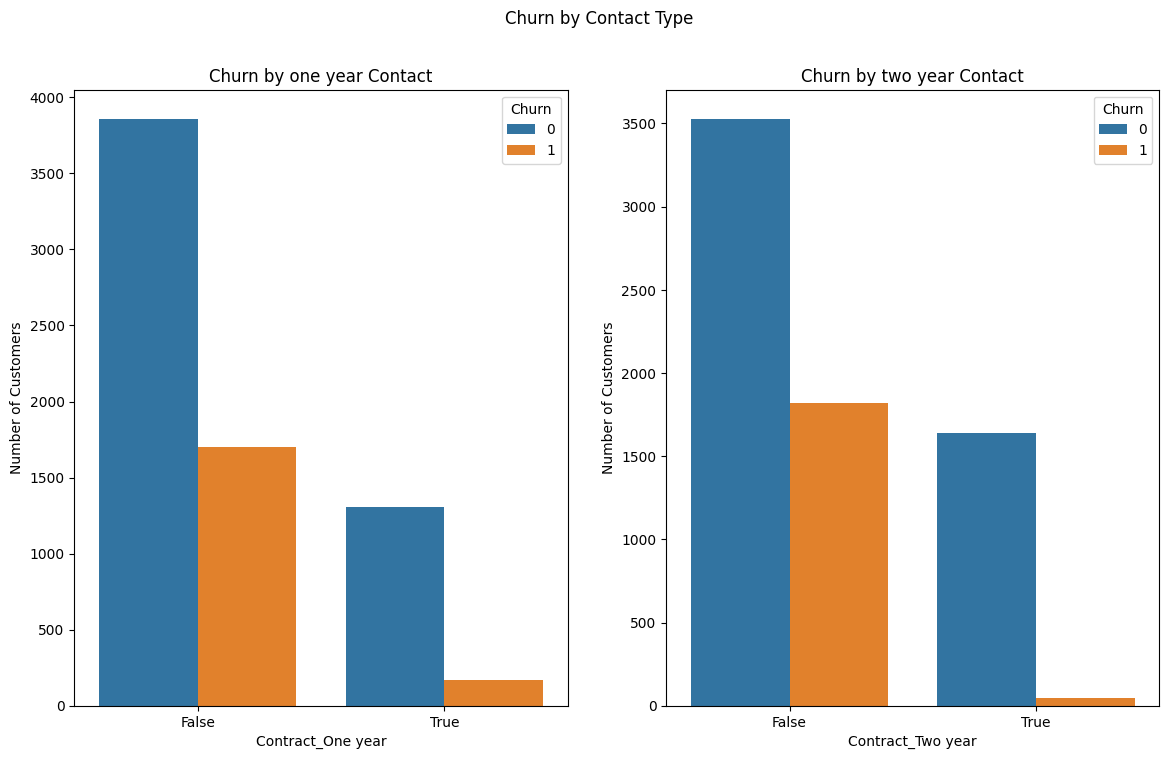

In [24]:
plt.figure(figsize=(14, 8))
plt.subplot(1,2,1)
sns.countplot(data=df, x = 'Contract_One year', hue= 'Churn')
plt.title('Churn by one year Contact')
plt.ylabel('Number of Customers')

plt.subplot(1,2,2)
sns.countplot(data=df, x = 'Contract_Two year', hue= 'Churn')
plt.title('Churn by two year Contact')
plt.ylabel('Number of Customers')

plt.suptitle('Churn by Contact Type')
plt.show()

## Churn by Internet Service Type

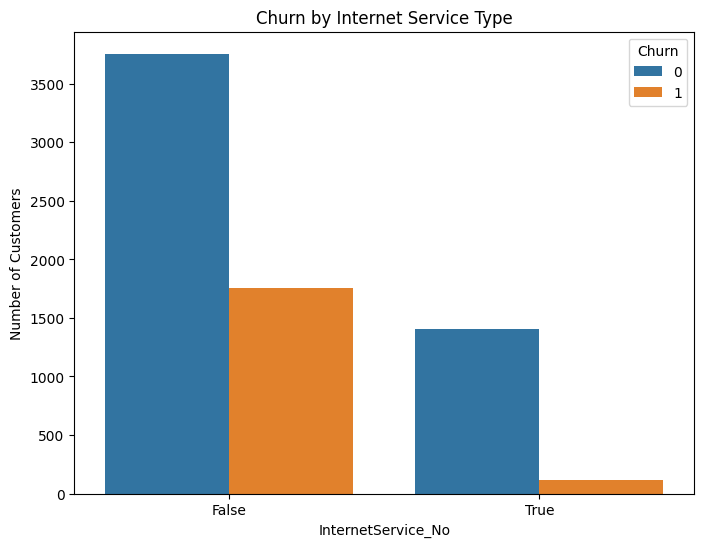

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data= df, x = 'InternetService_No', hue='Churn')
plt.title('Churn by Internet Service Type')
plt.ylabel('Number of Customers')
plt.show()

In [26]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# Model Building

In [27]:
from sklearn.model_selection import train_test_split 

In [28]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [30]:
x_train.shape, y_train.shape

((5625, 30), (5625,))

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

/home/sabin/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [35]:
lr.score(x_train, y_train)* 100, lr.score(x_test, y_test)*100

(80.87111111111112, 78.74911158493248)

In [36]:
y_prd_lr = lr.predict(x_test)

In [37]:
accuracy_score(y_test, y_prd_lr)

0.7874911158493249

In [38]:
confusion_matrix(y_test, lr.predict(x_test))

array([[915, 118],
       [181, 193]])

In [39]:
classification_report(y_test, y_prd_lr)

'              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86      1033\n           1       0.62      0.52      0.56       374\n\n    accuracy                           0.79      1407\n   macro avg       0.73      0.70      0.71      1407\nweighted avg       0.78      0.79      0.78      1407\n'

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

In [41]:
dt.fit(x_train, y_train)
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(99.76888888888888, 72.42359630419331)

In [42]:
y_prd_dt = dt.predict(x_test)

In [43]:
accuracy_score(y_test, y_prd_dt)

0.7242359630419332

In [44]:
confusion_matrix(y_test, y_prd_dt)

array([[830, 203],
       [185, 189]])

In [45]:
classification_report(y_test,y_prd_dt)

'              precision    recall  f1-score   support\n\n           0       0.82      0.80      0.81      1033\n           1       0.48      0.51      0.49       374\n\n    accuracy                           0.72      1407\n   macro avg       0.65      0.65      0.65      1407\nweighted avg       0.73      0.72      0.73      1407\n'

## Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(random_state=40)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)*100, rf.score(x_test, y_test)*100

(99.76888888888888, 79.60199004975125)

In [48]:
y_prd_rf = rf.predict(x_test)

In [49]:
accuracy_score(y_test, y_prd_rf)

0.7960199004975125

In [50]:
confusion_matrix(y_test, y_prd_rf)

array([[935,  98],
       [189, 185]])

## Feature Importance for Random Forest

In [51]:
importance = rf.feature_importances_
importance

array([0.02799319, 0.02114473, 0.02433941, 0.01999389, 0.17072471,
       0.00363834, 0.02536245, 0.17663545, 0.18966386, 0.00435756,
       0.0192428 , 0.0400189 , 0.00521207, 0.00346276, 0.02730928,
       0.00399   , 0.02067368, 0.00324637, 0.01840398, 0.00565017,
       0.0263815 , 0.00419579, 0.01747388, 0.00658724, 0.01806675,
       0.02600601, 0.02730877, 0.01401345, 0.03600951, 0.0128935 ])

In [52]:
indices = np.argsort(importance)[-10:][::-1]
indices

array([ 8,  7,  4, 11, 28,  0, 14, 26, 20, 25])

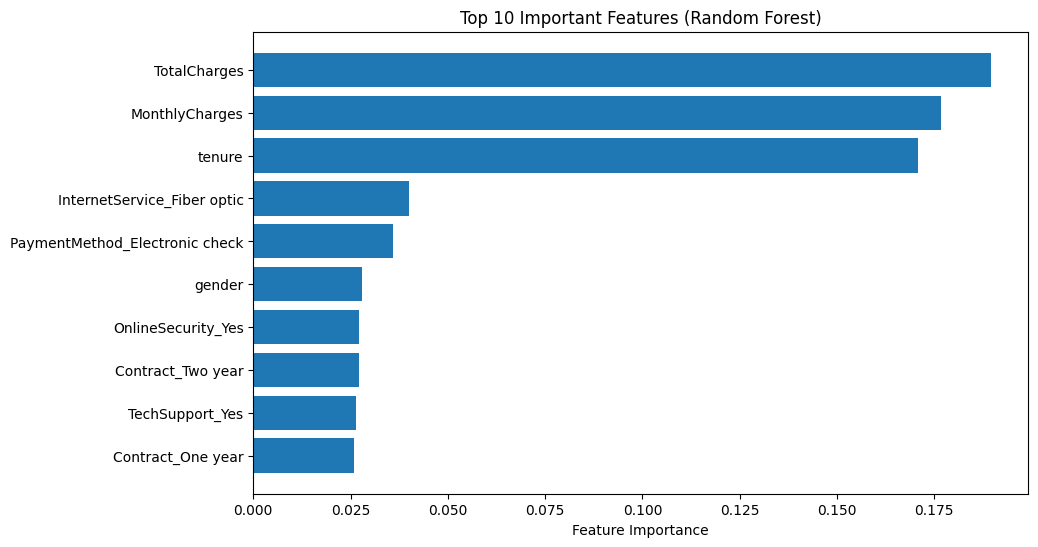

In [53]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Important Features (Random Forest)')
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [x.columns[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.show()

## Hyperparameter Tuning 


In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [56]:
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=40),
    param_distributions=param_dist, 
    n_iter=50, 
    scoring='accuracy', 
    cv=3, 
    random_state=40, 
    n_jobs=-1, 
    verbose=1
)

In [57]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/home/sabin/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
51 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sabin/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sabin/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/sabin/myenv/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/sabin/myenv/lib/pyth

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=40),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=40, scoring='accuracy', verbose=1)

In [58]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10}

In [59]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [60]:
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [61]:
model = RandomForestClassifier(random_state=40, 
                              n_estimators=300, 
                              min_samples_split=5, 
                              min_samples_leaf=4, 
                              max_features='log2', 
                              max_depth=10)

In [62]:
model.fit(x_train_res, y_train_res)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=300, random_state=40)

In [63]:
model.score(x_train_res, y_train_res)*100, model.score(x_test, y_test)*100

(86.65859564164649, 76.04832977967307)

## Using LGBMClassifier

In [64]:
from lightgbm import  LGBMClassifier

In [65]:
lg = LGBMClassifier(random_state=42)
lg.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


LGBMClassifier(random_state=42)

In [66]:
lg.score(x_train, y_train), lg.score(x_test, y_test)

(0.8821333333333333, 0.7910447761194029)

In [67]:
accuracy_score(y_test, lg.predict(x_test))

0.7910447761194029

## Using XGBoost

In [68]:
from xgboost import XGBClassifier

In [69]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)

/home/sabin/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:58:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [70]:
xgb.score(x_train, y_train), xgb.score(x_test, y_test)

(0.9404444444444444, 0.7739872068230277)

In [71]:
accuracy_score(y_test, xgb.predict(x_test))

0.7739872068230277

## Cross-Validation with Stratification

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
scores.mean()

np.float64(0.8000548972269318)

## Define Hyperparameter Grid (XGBoost)

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [76]:
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [77]:
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [78]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/home/sabin/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:59:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sabin/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:59:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sabin/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:59:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sabin/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:59:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sabin/myenv/lib/python3.12/site-packages/xgboost/training.py:183: 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [79]:
best_xgb = grid_search.best_estimator_
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [80]:
grid_search.best_score_

np.float64(0.807111111111111)

In [81]:
y_pred_best_xgb = best_xgb.predict(x_test)

In [82]:
accuracy_score(y_test, y_pred_best_xgb)

0.7945984363894811

In [83]:
classification_report(y_test, y_pred_best_xgb)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.87      1033\n           1       0.65      0.51      0.57       374\n\n    accuracy                           0.79      1407\n   macro avg       0.74      0.70      0.72      1407\nweighted avg       0.78      0.79      0.79      1407\n'

# Save the model

In [84]:
import joblib

In [85]:
joblib.dump(best_xgb, 'xgb_churn_model.pkl')

['xgb_churn_model.pkl']

In [86]:
loaded_model = joblib.load('xgb_churn_model.pkl')
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [87]:
y_pred_loaded = loaded_model.predict(x_test)
y_pred_loaded

array([0, 0, 1, ..., 0, 0, 0])